<a href="https://colab.research.google.com/github/voleka-ocrv/ChatGPT_for_data_analists/blob/main/Prompt_Engineering_for_Data_Analysts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEXT

- [ChatGPT](https://chatgpt.com)
- [Chat GPT Prompt Engineering by Elena Kochkina](https://www.youtube.com/watch?v=3enJP-b2fXk)

Prompt Engineering
- Assign a role
- Give context
- Provide a data example

You can use quatation marks to define an example.

**PROMPT**
>You are a professional data analyst with 20 years of experience and edge-cutting knowledge of all the tools and techniques.

>I have a dataset called Walmart_Sales.csv”. This dataset contains information on Walmart stores in the US, including weekly sales in US dollars. Each store has a unique ID and a specific store type. Sales data is further categorised by department ID. The dataset also includes additional information such as holiday weeks, average temperature, fuel prices, and national unemployment rates for each week. I will analyse this data to generate a comprehensive report.

>Here is a chunk of the that file:
"
```
Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
```
"

In [ ]:
# Upload the csv file to your session
! gdown  1g8lRX9qk3r9cdue-6Hx3Tu9qwCgEpeCT

Downloading...
From: https://drive.google.com/uc?id=1g8lRX9qk3r9cdue-6Hx3Tu9qwCgEpeCT
To: /content/Walmart_Sales.csv
100% 364k/364k [00:00<00:00, 5.75MB/s]


# DESCRIPTIVE SUMMARY STATISTICS

**PROMPT**
>Display all statistics, using standard output, join all comanda in one cell.

Then the output you can send back to ChatGPT and ask for a summary report.

**PROMPT**
>Here are what I got from your Python script above:

\<Paste Output from the previous step\>

>Based on this information create a brief report.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Walmart_Sales.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display data types
print("\nData types of each column:")
print(df.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Count unique values in categorical columns (if you have categorical variables such as Store types)
print("\nUnique store counts:")
print(df['Store'].nunique())

# Check for correlation between numerical variables
print("\nCorrelation matrix between numerical variables:")
print(df.corr())

# Display sales statistics over time
print("\nBasic statistics of Weekly Sales grouped by Store:")
print(df.groupby('Store')['Weekly_Sales'].agg(['mean', 'min', 'max', 'std']))

# Display sales trends over time
print("\nWeekly Sales statistics by Date:")
print(df.groupby('Date')['Weekly_Sales'].agg(['mean', 'min', 'max', 'std']))

First few rows of the dataset:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Missing values in each column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data types of each column:
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag          

# HISTOGRAM AND BOXPLOT

**PROMPT**
>Visualize all numerical variables using pandas. Draw a histogram and a box plot for each variable on the same chart using subplots. Rotate the box plot horizontally.

You may get an error, when you will run the code. Ask ChatGPT to help with that.

**PROMPT**
>I ran the code and got this error "NameError: name 'plt' is not defined"

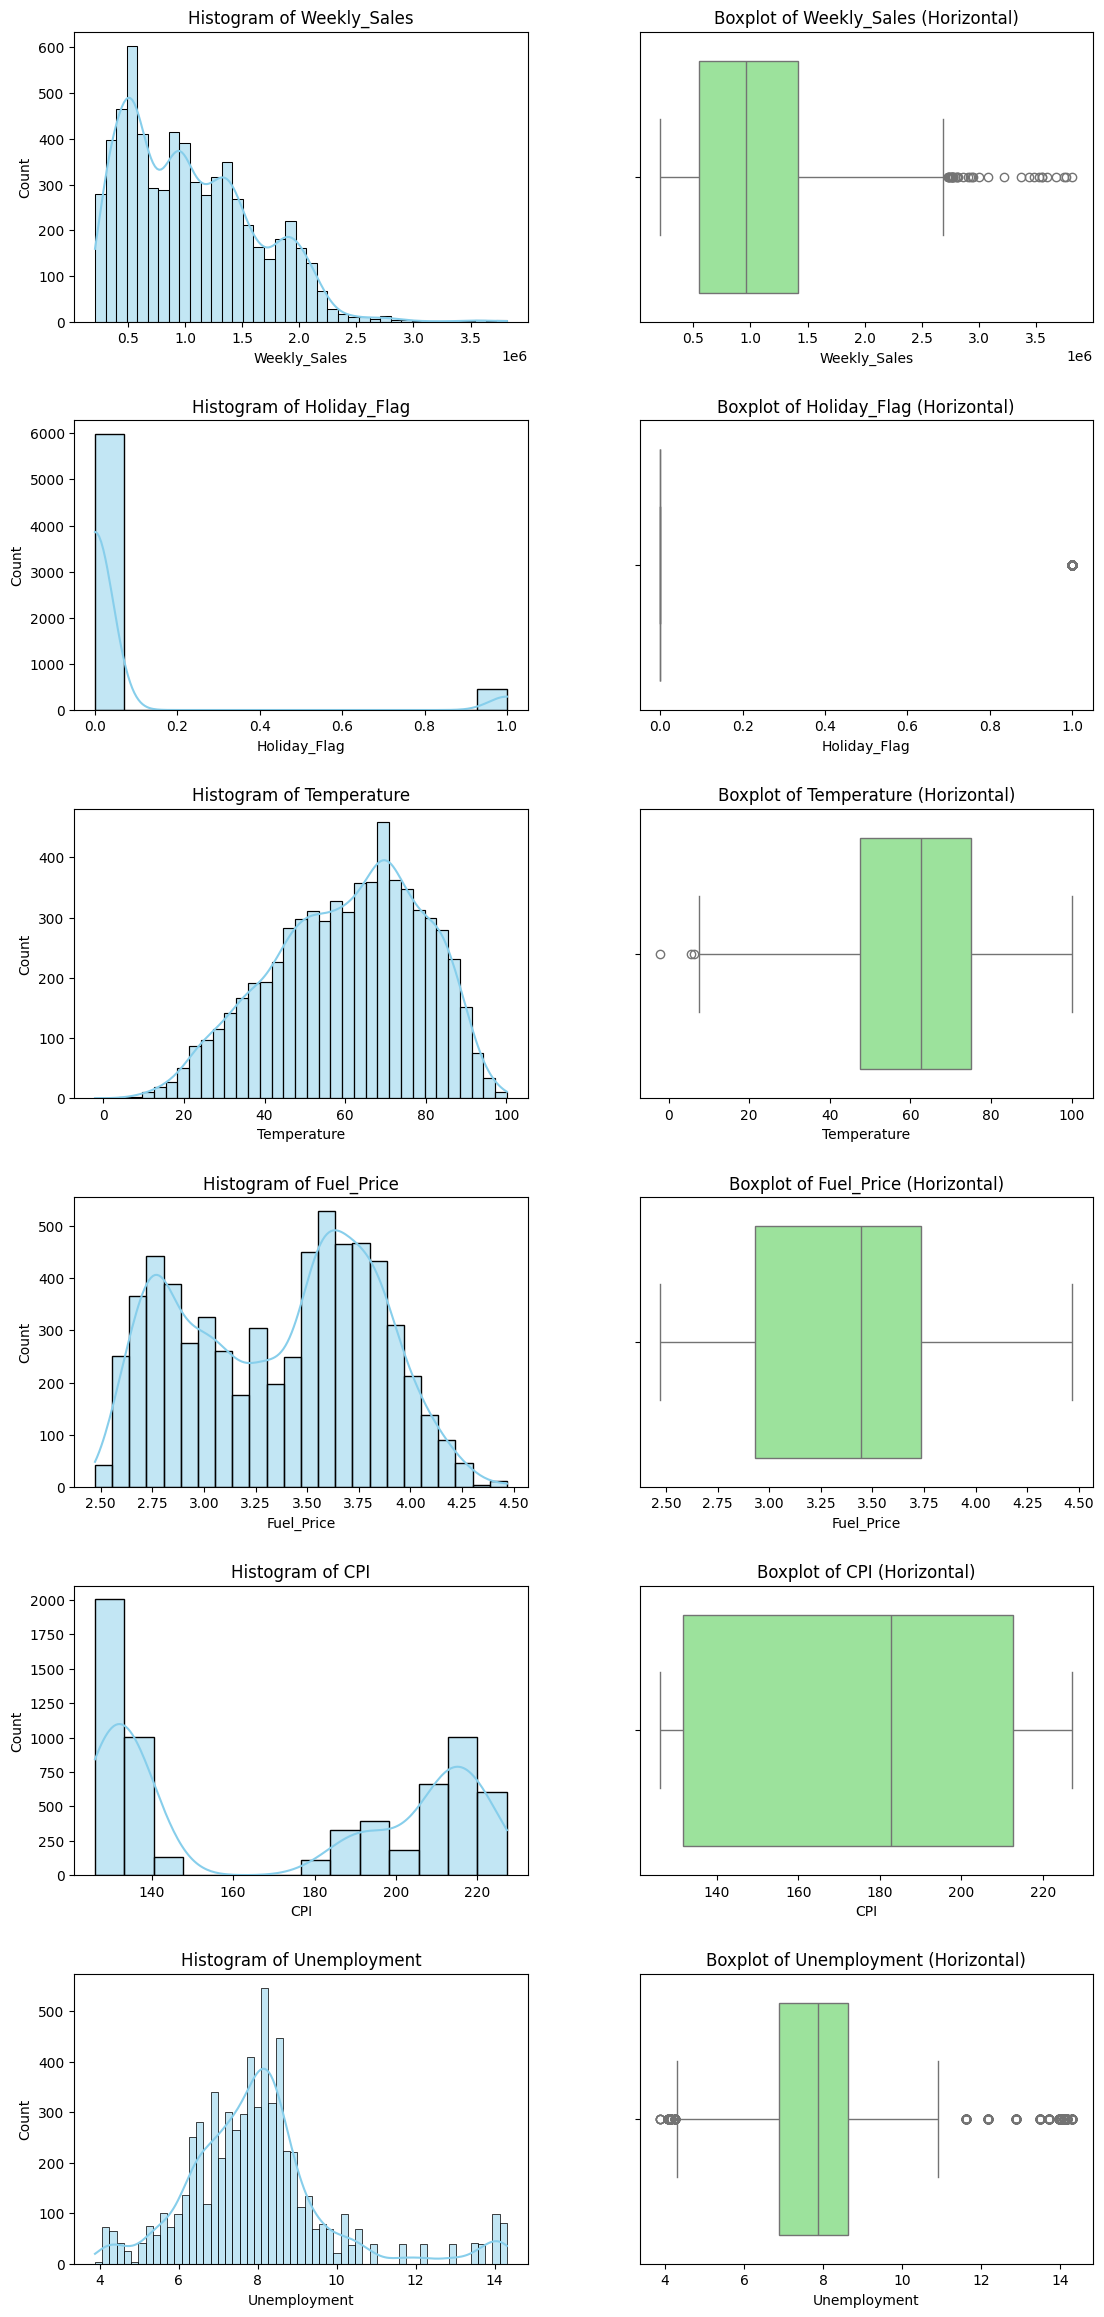

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numerical columns to visualize
num_columns = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(len(num_columns), 2, figsize=(12, len(num_columns) * 4))
fig.tight_layout(pad=5.0)

# Loop through each numerical column and create a histogram and boxplot
for i, col in enumerate(num_columns):
    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')

    # Boxplot (horizontal)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col} (Horizontal)')

# Show the plots
plt.show()

# OUTLIERS
Visualisation shows that there are outliers in our dataset. Ask ChatGPT to remove the outliers.

**PROMPT**
>Create a new data frame without outliers for all numerical variables using the interquartile range and build a nistogram of the old and the new dataframes.

Compare statistics before and after removing outliers.

**PROMPT**
>Create a custom IQR function and print IQR, mean, and standard deviation of weekly_sales for the old dataframe and the new dataframe (without outliers), using pandas and the agg() function.

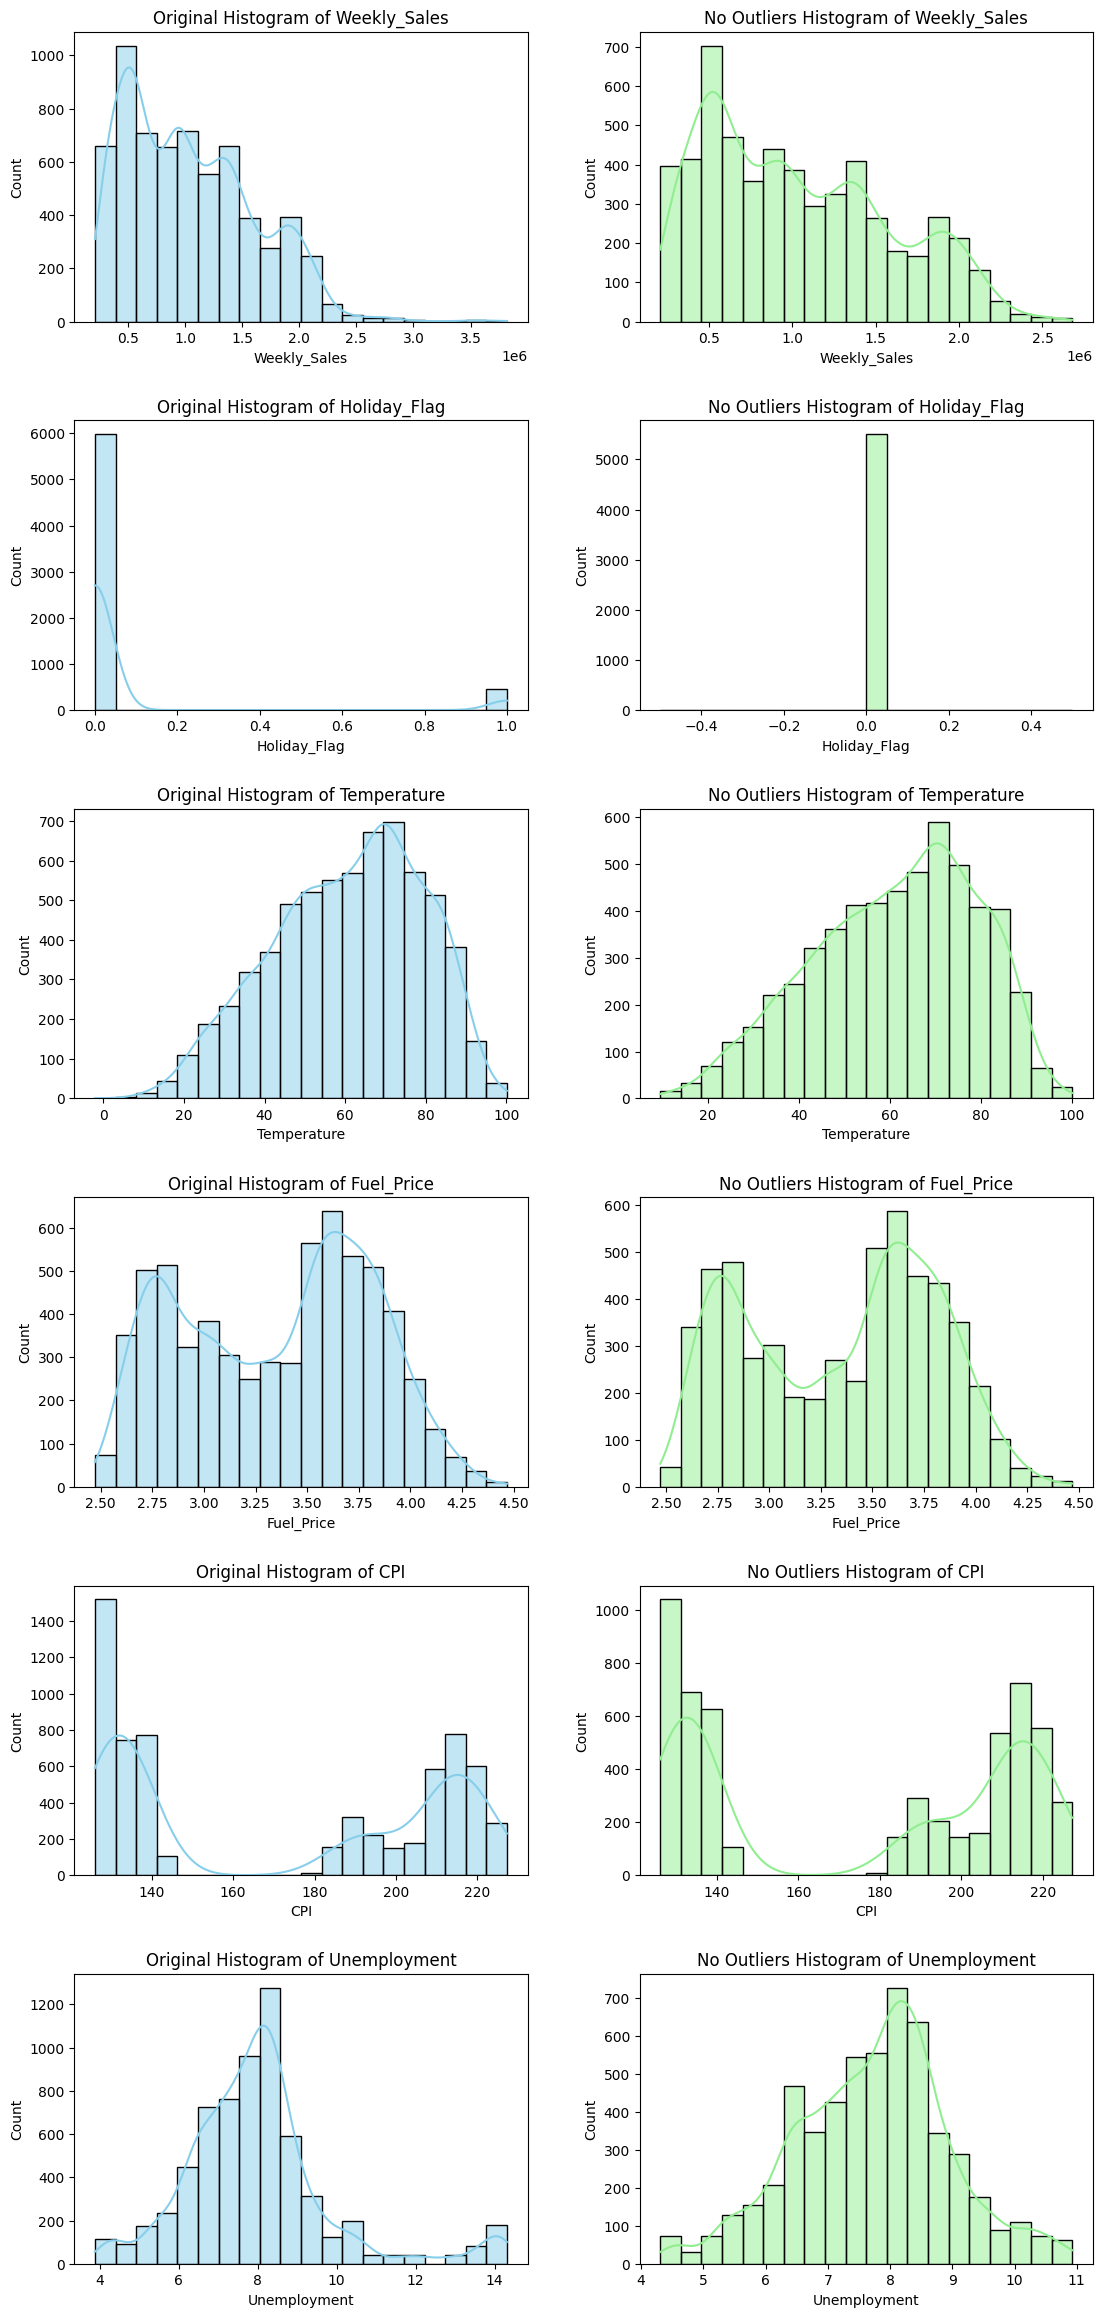

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_columns = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create a new DataFrame without outliers
df_no_outliers = df.copy()

for col in num_columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Plotting histograms for both dataframes
fig, axes = plt.subplots(len(num_columns), 2, figsize=(12, len(num_columns) * 4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(num_columns):
    # Original DataFrame histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='skyblue', bins=20)
    axes[i, 0].set_title(f'Original Histogram of {col}')

    # New DataFrame without outliers histogram
    sns.histplot(data=df_no_outliers, x=col, kde=True, ax=axes[i, 1], color='lightgreen', bins=20)
    axes[i, 1].set_title(f'No Outliers Histogram of {col}')

# Show the plots
plt.show()

In [ ]:
import pandas as pd

# Define the custom IQR function
def custom_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q3 - Q1

# Create a new DataFrame without outliers
df_no_outliers = df.copy()
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_no_outliers[(df_no_outliers['Weekly_Sales'] >= lower_bound) & (df_no_outliers['Weekly_Sales'] <= upper_bound)]

# Calculate statistics for original DataFrame
original_stats = df['Weekly_Sales'].agg(['mean', 'std', custom_iqr])
original_stats.name = 'Original'

# Calculate statistics for new DataFrame without outliers
no_outliers_stats = df_no_outliers['Weekly_Sales'].agg(['mean', 'std', custom_iqr])
no_outliers_stats.name = 'No Outliers'

# Combine the statistics into a single DataFrame
stats_df = pd.concat([original_stats, no_outliers_stats], axis=1)
stats_df.columns = ['Original', 'No Outliers']

# Print the results
print(stats_df)

                Original   No Outliers
mean        1.046965e+06  1.036130e+06
std         5.643666e+05  5.451961e+05
custom_iqr  8.668086e+05  8.628215e+05


# CUMULATIVE STATISTICS

To calculate the cumulative sum the dataset must be sorted. You can add that conditon in your prompt.

**PROMPT**

>Sort the dataframe by date. Calculate the cumulative sum of weekly_sales and add it as a column named 'weekly_sales_cumsum'. Calculate the cumulative maximum of weekly_sales and add it as a column named 'weekly_sales_cummax'. Print the calculated columns.

In [ ]:
import pandas as pd

# Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Calculate the cumulative sum of Weekly_Sales
df['weekly_sales_cumsum'] = df['Weekly_Sales'].cumsum()

# Calculate the cumulative maximum of Weekly_Sales
df['weekly_sales_cummax'] = df['Weekly_Sales'].cummax()

# Print the calculated columns
print(df[['Date', 'Weekly_Sales', 'weekly_sales_cumsum', 'weekly_sales_cummax']])

           Date  Weekly_Sales  weekly_sales_cumsum  weekly_sales_cummax
0    2010-02-05    1643690.90         1.643691e+06           1643690.90
1287 2010-02-05    2193048.75         3.836740e+06           2193048.75
5148 2010-02-05     536006.73         4.372746e+06           2193048.75
2288 2010-02-05     789036.02         5.161782e+06           2193048.75
4147 2010-02-05     465108.52         5.626891e+06           2193048.75
...         ...           ...                  ...                  ...
3574 2012-10-26     688940.94         6.734090e+09           3818686.45
714  2012-10-26     319550.77         6.734410e+09           3818686.45
5719 2012-10-26     921264.52         6.735331e+09           3818686.45
2573 2012-10-26    1127516.25         6.736459e+09           3818686.45
6434 2012-10-26     760281.43         6.737219e+09           3818686.45

[6435 rows x 4 columns]


# GROUP SUMMARY STATISTICS

**PROMPT**

>Sort the dataframe by date, and filter the data for the year 2010. Group data by "date" (convert to month) and "store" and calculate the cumulative sum of "weekly_sales" as "cumulative_sales". Create a pivot table to organize the data for plotting cumulative sales. And print the calculated columns for store number 1.

In [ ]:
import pandas as pd

# Step 1: Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Step 2: Filter the data for the year 2010
df_2010 = df[df['Date'].dt.year == 2010]

# Step 3: Create a 'Month' column from the 'Date' column
df_2010['Month'] = df_2010['Date'].dt.to_period('M')  # Convert to month periods (YYYY-MM)

# Step 4: Group by 'Month' and 'Store', and calculate the cumulative sum of 'Weekly_Sales'
pivot = pd.pivot_table(df_2010, values='Weekly_Sales', index='Month', columns='Store', aggfunc='sum')

# Step 5: Apply cumulative sum across the columns
cumulative_sum = pivot.cumsum()
cumulative_sum.index = cumulative_sum.index.strftime('%b')

# Step 6: Print the results for store number 1
cumulative_sum.loc[:, 1]

<ipython-input-124-087bf4243845>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['Month'] = df_2010['Date'].dt.to_period('M')  # Convert to month periods (YYYY-MM)


,1
Month,
Feb,6307344.10
Mar,12178638.08
Apr,19601440.00
May,25531378.64
Jun,31615460.10
Jul,38859943.14
Aug,44935896.09
Sep,50765690.01
Oct,57916331.76


# PIVOT TABLES
**PROMPT**
>Plot a heat map with month in the columns and stores in the rows.

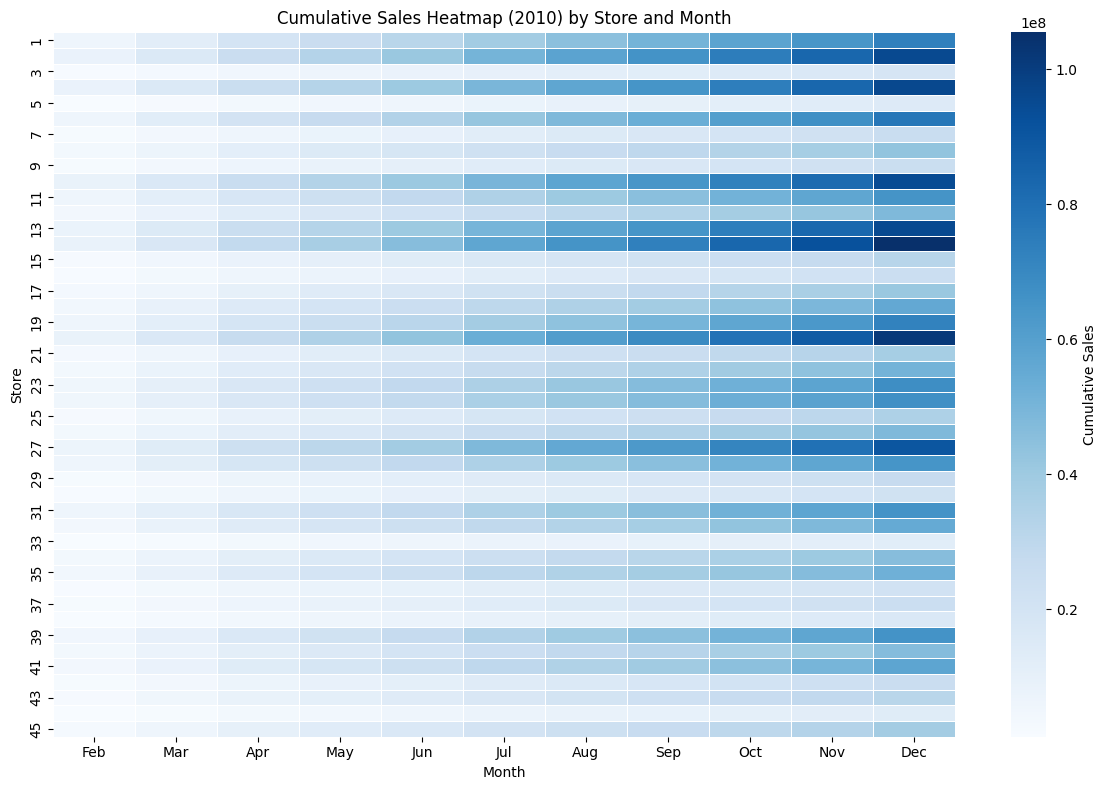

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the heat map
sns.heatmap(cumulative_sum.T, cmap='Blues', annot=False, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Cumulative Sales'})

# Add labels and title
plt.title('Cumulative Sales Heatmap (2010) by Store and Month')
plt.xlabel('Month')
plt.ylabel('Store')

# Show the heat map
plt.tight_layout()
plt.show()

# CONDITIONAL FORMATTING

**PROMPT**
>Rotate the table to make stores in the rows. Show amount in millions. And apply gradient conditional formatting to the table. Use grey color.

In [ ]:
import pandas as pd
import numpy as np

# Transpose the pivot table
pivot_table_transposed = cumulative_sum.T/1e6

# Format the values to millions and apply gradient conditional formatting using the 'Greens' colormap
styled_table_transposed = pivot_table_transposed.style \
    .format("{:.2f}M", na_rep='0.00M') \
    .background_gradient(cmap='Greys', axis=None)

# Display the styled table with gradient formatting
styled_table_transposed

Month,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Store,,,,,,,,,,,
1,6.31M,12.18M,19.60M,25.53M,31.62M,38.86M,44.94M,50.77M,57.92M,64.40M,73.28M
2,8.26M,15.94M,25.46M,33.24M,41.31M,50.63M,58.34M,65.60M,74.62M,83.09M,95.28M
3,1.71M,3.25M,5.14M,6.62M,8.09M,9.88M,11.33M,12.77M,14.57M,16.31M,18.75M
4,8.30M,15.82M,25.09M,32.73M,40.28M,49.52M,57.28M,64.79M,74.31M,83.21M,95.68M
5,1.20M,2.34M,3.90M,5.14M,6.38M,7.81M,8.97M,10.18M,11.59M,13.01M,14.84M
6,6.26M,12.58M,20.58M,26.90M,33.76M,41.89M,48.06M,53.58M,60.33M,67.12M,76.91M
7,2.02M,4.08M,6.31M,7.92M,9.96M,12.86M,15.24M,17.29M,19.62M,21.92M,25.57M
8,3.81M,7.16M,11.51M,14.98M,18.54M,22.66M,26.18M,29.52M,33.69M,37.68M,43.20M
9,2.09M,4.06M,6.60M,8.68M,10.81M,13.23M,15.25M,17.16M,19.59M,21.91M,25.13M


The analysis shows that certain stores such as 4, 10, 13, 14, 20, 27 consistently performed better than others in terms of weekly sales.